In [1]:
import numpy as np
import mmk
import mmk.logic.pctl as pctl
import mmk.logic.mtl as mtl

In [2]:
def pretty_print_pctl(chain: mmk.MarkovChain, formula: str, vector: np.ndarray):
    for s, p in chain.vector_to_state_weights(vector).items():
        m = "⊨" if p else "⊭"
        print(f"{s} {m} {formula}")

def pretty_print_mtl(chain: mmk.MarkovChain, formula: str, vector: np.ndarray):
    for s, p in chain.vector_to_state_weights(vector).items():
        print(f"ℙ ( {s} ⊨ {formula} ) = {p}")    

In [3]:
simple_com_proto = mmk.MarkovChain(
    {
        "start": {
            "try": 1.
        },
        "try": {
            "lost": .1,
            "delivered": .9,
        },
        "lost": {
            "try": 1.,
        },
        "delivered": {
            "start": 1.,
        },
    }
)

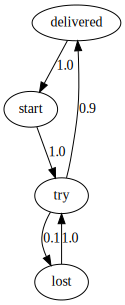

In [4]:
simple_com_proto.to_graphviz()

In [5]:
formula = "eventually delivered"
p = mtl.evaluate(simple_com_proto, formula)
pretty_print_mtl(simple_com_proto, formula, p)

ℙ ( delivered ⊨ eventually delivered ) = 1.0
ℙ ( lost ⊨ eventually delivered ) = 1.0000000000000036
ℙ ( start ⊨ eventually delivered ) = 0.999999999999996
ℙ ( try ⊨ eventually delivered ) = 1.0


In [6]:
# Note that logical connective are written in Polish notation
formula = """and
    probability within [ 1 1 ] ( eventually delivered )
    probability within [ 1 1 ] (
        always (
            implies
                try
                probability within [ 0.99 1 ] ( eventually within 3 delivered )
        )
    )"""
p = pctl.evaluate(simple_com_proto, formula)
pretty_print_pctl(simple_com_proto, "Φ", p)

delivered ⊨ Φ
lost ⊨ Φ
start ⊨ Φ
try ⊨ Φ


In [7]:
craps = mmk.MarkovChain(
    {
        "10": {
            "10": 3 / 4,
            "lost": 1 / 6,
            "won": 1 / 12,
        },
        "4": {
            "4": 3 / 4,
            "lost": 1 / 6,
            "won": 1 / 12,
        },
        "5": {
            "5": 13 / 18,
            "lost": 1 / 6,
            "won": 1 / 9,
        },
        "6": {
            "6": 25 / 36,
            "lost": 1 / 6,
            "won": 5 / 36,
        },
        "8": {
            "8": 25 / 36,
            "lost": 1 / 6,
            "won": 5 / 36,
        },
        "9": {
            "9": 13 / 18,
            "lost": 1 / 6,
            "won": 1 / 9,
        },
        "lost": {
            "lost": 1,
        },
        "start": {
            "10": 1 / 12,
            "4": 1 / 12,
            "5": 1 / 9,
            "6": 5 / 36,
            "8": 5 / 36,
            "9": 1 / 9,
            "lost": 1 / 9,
            "won": 2 / 9,
        },
        "won": {
            "won": 1.,
        },
    }
)

In [8]:
formula = "eventually won"
p = mtl.evaluate(craps, formula)
pretty_print_mtl(craps, formula, p)

ℙ ( 10 ⊨ eventually won ) = 0.3333333333333335
ℙ ( 4 ⊨ eventually won ) = 0.3333333333333334
ℙ ( 5 ⊨ eventually won ) = 0.39999999999999863
ℙ ( 6 ⊨ eventually won ) = 0.4545454545454544
ℙ ( 8 ⊨ eventually won ) = 0.4545454545454544
ℙ ( 9 ⊨ eventually won ) = 0.3999999999999993
ℙ ( lost ⊨ eventually won ) = 0.0
ℙ ( start ⊨ eventually won ) = 0.49292929292929266
ℙ ( won ⊨ eventually won ) = 1.0


In [9]:
formula = "start,4,5,6 until within 2 won"
p = mtl.evaluate(craps, formula)
pretty_print_mtl(craps, formula, p)

ℙ ( 10 ⊨ start,4,5,6 until within 2 won ) = 0.08333333333333333
ℙ ( 4 ⊨ start,4,5,6 until within 2 won ) = 0.14583333333333331
ℙ ( 5 ⊨ start,4,5,6 until within 2 won ) = 0.19135802469135801
ℙ ( 6 ⊨ start,4,5,6 until within 2 won ) = 0.2353395061728395
ℙ ( 8 ⊨ start,4,5,6 until within 2 won ) = 0.1388888888888889
ℙ ( 9 ⊨ start,4,5,6 until within 2 won ) = 0.1111111111111111
ℙ ( lost ⊨ start,4,5,6 until within 2 won ) = 0.0
ℙ ( start ⊨ start,4,5,6 until within 2 won ) = 0.26080246913580246
ℙ ( won ⊨ start,4,5,6 until within 2 won ) = 1.0


In [10]:
formula = """probability within [ 0.32 1 ] (
    not 8,9,10
    until within 5 won
)"""
p = pctl.evaluate(craps, formula)
pretty_print_pctl(craps, "Φ", p)

10 ⊭ Φ
4 ⊭ Φ
5 ⊨ Φ
6 ⊨ Φ
8 ⊭ Φ
9 ⊭ Φ
lost ⊭ Φ
start ⊨ Φ
won ⊨ Φ


In [11]:
dice = mmk.MarkovChain(
    {
        "1": {
            "1": 1,
        },
        "2": {
            "2": 1,
        },
        "3": {
            "3": 1,
        },
        "4": {
            "4": 1,
        },
        "5": {
            "5": 1,
        },
        "6": {
            "6": 1,
        },
        "s0": {
            "s123": .5,
            "s456": .5,
        },
        "s123_": {
            "s123": .5,
            "1": .5,
        },
        "s123": {
            "s123_": .5,
            "s23": .5,
        },
        "s23": {
            "2": .5,
            "3": .5,
        },
        "s45": {
            "4": .5,
            "5": .5,
        },
        "s456_": {
            "s456": .5,
            "6": .5,
        },
        "s456": {
            "s45": .5,
            "s456_": .5,
        },
    }
)

In [12]:
for i in range(1, 7):
    formula = "eventually " + str(i)
    p = mtl.evaluate(dice, formula)
    p = p[dice.state_index("s0")]
    print(f"ℙ ( s0 ⊨ {formula} ) = {p}")

ℙ ( s0 ⊨ eventually 1 ) = 0.16666666666666655
ℙ ( s0 ⊨ eventually 2 ) = 0.16666666666666646
ℙ ( s0 ⊨ eventually 3 ) = 0.16666666666666646
ℙ ( s0 ⊨ eventually 4 ) = 0.16666666666666638
ℙ ( s0 ⊨ eventually 5 ) = 0.16666666666666638
ℙ ( s0 ⊨ eventually 6 ) = 0.16666666666666674


In [13]:
p = .05
q = .1
zeroconf_proto = mmk.MarkovChain(
    {
        "start": {
            "s1": q,
            "ok": 1 - q,
        },
        "s1": {
            "start": 1 - p,
            "s2": p,
        },
        "s2": {
            "start": 1 - p,
            "s3": p,
        },
        "s3": {
            "start": 1 - p,
            "s4": p,
        },
        "s4": {
            "start": 1 - p,
            "error": p,
        },
        "error": {
            "error": 1.,
        },
        "ok": {
            "ok": 1.,
        },
    }
)

In [14]:
formula = "eventually within 5 ok"
p = mtl.evaluate(zeroconf_proto, formula)
pretty_print_mtl(zeroconf_proto, formula, p)

ℙ ( error ⊨ eventually within 5 ok ) = 0.0
ℙ ( ok ⊨ eventually within 5 ok ) = 1.0
ℙ ( s1 ⊨ eventually within 5 ok ) = 0.989341875
ℙ ( s2 ⊨ eventually within 5 ok ) = 0.989235
ℙ ( s3 ⊨ eventually within 5 ok ) = 0.9870975
ℙ ( s4 ⊨ eventually within 5 ok ) = 0.94028625
ℙ ( start ⊨ eventually within 5 ok ) = 0.99811125
